### Example use of pandas and geopandas to display and manipulate geospatial data

In [171]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [172]:
datasets = "/Users/rmartinshort/Documents/Citadel_datathon/Datathon_materials/"
uscounties = "/Users/rmartinshort/Documents/Citadel_datathon/Datasets/cb_2017_us_county_500k/"
usstates = "/Users/rmartinshort/Documents/Citadel_datathon/Datasets/cb_2017_us_state_500k/"

In [173]:
industry_df = pd.read_csv(datasets+'industry_occupation.csv',encoding='iso-8859-1')

In [174]:
industry_df.head()

,geo_id,fips,county,total_employed,agriculture,construction,manufacturing,wholesale_trade,retail_trade,transport_utilities,information,finance_insurance_realestate,prof_scientific_waste,edu_health,arts_recreation,other,public_admin,year
0,0500000US01003,1003,"Baldwin County, Alabama",77263.0,1302.0,6489.0,6134.0,2131.0,9525.0,3557.0,940.0,5893.0,9873.0,14753.0,8257.0,3575.0,4834.0,2010
1,0500000US01015,1015,"Calhoun County, Alabama",42768.0,337.0,1371.0,7868.0,750.0,5706.0,1626.0,779.0,2234.0,3776.0,8351.0,3799.0,2440.0,3731.0,2010
2,0500000US01043,1043,"Cullman County, Alabama",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010
3,0500000US01049,1049,"DeKalb County, Alabama",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010
4,0500000US01051,1051,"Elmore County, Alabama",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010


In [175]:
industry_df.dropna(inplace=True)

Get just the counties for which we have data in 2016 (the latest year)

In [176]:
industry_df_2016 = industry_df[industry_df['year']==2016]

In [177]:
len(industry_df_2016)

711

In [178]:
industry_df_2016.head()

,geo_id,fips,county,total_employed,agriculture,construction,manufacturing,wholesale_trade,retail_trade,transport_utilities,information,finance_insurance_realestate,prof_scientific_waste,edu_health,arts_recreation,other,public_admin,year
4885,0500000US01003,1003,"Baldwin County, Alabama",90197.0,1025.0,6108.0,9300.0,3509.0,10820.0,5422.0,546.0,7683.0,9836.0,18914.0,6680.0,6676.0,3678.0,2016
4886,0500000US01015,1015,"Calhoun County, Alabama",46812.0,922.0,2683.0,8247.0,1766.0,5953.0,2076.0,566.0,1770.0,3400.0,9808.0,4130.0,1870.0,3621.0,2016
4887,0500000US01043,1043,"Cullman County, Alabama",32765.0,883.0,3294.0,5326.0,808.0,4227.0,1254.0,372.0,1472.0,2803.0,7629.0,1561.0,1837.0,1299.0,2016
4890,0500000US01055,1055,"Etowah County, Alabama",40918.0,177.0,2212.0,8184.0,1476.0,5061.0,2069.0,1074.0,1396.0,1415.0,8226.0,4989.0,2827.0,1812.0,2016
4891,0500000US01069,1069,"Houston County, Alabama",43418.0,674.0,2732.0,4005.0,1429.0,6042.0,3053.0,888.0,1584.0,3531.0,10504.0,3884.0,2980.0,2112.0,2016


Load the counties geometry and merge it with the industry data

In [179]:
us_counties_df = gpd.read_file(uscounties+'cb_2017_us_county_500k.shp')

In [180]:
us_counties_df.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,01,005,00161528,0500000US01005,01005,Barbour,06,2292144656,50538698,"POLYGON ((-85.74803199999999 31.619181, -85.74..."
1,01,023,00161537,0500000US01023,01023,Choctaw,06,2365869837,19144469,"POLYGON ((-88.47322699999999 31.893856, -88.46..."
2,01,035,00161543,0500000US01035,01035,Conecuh,06,2201948618,6643480,"POLYGON ((-87.42720399999999 31.26436, -87.425..."
3,01,051,00161551,0500000US01051,01051,Elmore,06,1601762124,99965171,"POLYGON ((-86.41333499999999 32.750591, -86.37..."
4,01,065,00161558,0500000US01065,01065,Hale,06,1667907107,32423356,"POLYGON ((-87.870464 32.762442, -87.868184 32...."


In [181]:
us_counties_df['geo_id'] = us_counties_df['AFFGEOID']

In [182]:
stateIDS = list(us_counties_df['STATEFP'])
countyIDS = list(us_counties_df['COUNTYFP'])
us_counties_df['fips'] = [int(stateIDS[i]+countyIDS[i]) for i in range(len(stateIDS))]

In [183]:
us_counties_df.dtypes

STATEFP     object
COUNTYFP    object
COUNTYNS    object
AFFGEOID    object
GEOID       object
NAME        object
LSAD        object
ALAND        int64
AWATER       int64
geometry    object
geo_id      object
fips         int64
dtype: object

Join on ID column

In [184]:
us_industry_counties_2016 = industry_df_2016.merge(us_counties_df,on='fips')

In [185]:
len(us_industry_counties_2016)

711

In [186]:
us_industry_counties_2016.head()

,geo_id_x,fips,county,total_employed,agriculture,construction,manufacturing,wholesale_trade,retail_trade,transport_utilities,...,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,geo_id_y
0,0500000US01003,1003,"Baldwin County, Alabama",90197.0,1025.0,6108.0,9300.0,3509.0,10820.0,5422.0,...,003,00161527,0500000US01003,01003,Baldwin,06,4117605847,1133109409,"POLYGON ((-88.02857999999999 30.226763, -88.02...",0500000US01003
1,0500000US01015,1015,"Calhoun County, Alabama",46812.0,922.0,2683.0,8247.0,1766.0,5953.0,2076.0,...,015,00161533,0500000US01015,01015,Calhoun,06,1569244078,16573120,"POLYGON ((-86.146225 33.702176, -86.1457719999...",0500000US01015
2,0500000US01043,1043,"Cullman County, Alabama",32765.0,883.0,3294.0,5326.0,808.0,4227.0,1254.0,...,043,00161547,0500000US01043,01043,Cullman,06,1903070708,52424813,"POLYGON ((-87.15103599999999 33.993225, -87.11...",0500000US01043
3,0500000US01055,1055,"Etowah County, Alabama",40918.0,177.0,2212.0,8184.0,1476.0,5061.0,2069.0,...,055,00161553,0500000US01055,01055,Etowah,06,1386383039,34559412,"POLYGON ((-86.369625 33.941185, -86.368043 33....",0500000US01055
4,0500000US01069,1069,"Houston County, Alabama",43418.0,674.0,2732.0,4005.0,1429.0,6042.0,3053.0,...,069,00161560,0500000US01069,01069,Houston,06,1501807104,4730565,"POLYGON ((-85.71208999999999 31.197266, -85.70...",0500000US01069


In [187]:
employ_types = list(us_industry_counties_2016.columns[4:17])
total_employment = us_industry_counties_2016['total_employed']

In [188]:
#Determine proportion of county's employed population in each industry
for name in employ_types:
    colname = '%s_prop' %name
    us_industry_counties_2016[colname] = 100*us_industry_counties_2016[name]/total_employment

In [189]:
us_industry_counties_2016.head()

,geo_id_x,fips,county,total_employed,agriculture,construction,manufacturing,wholesale_trade,retail_trade,transport_utilities,...,wholesale_trade_prop,retail_trade_prop,transport_utilities_prop,information_prop,finance_insurance_realestate_prop,prof_scientific_waste_prop,edu_health_prop,arts_recreation_prop,other_prop,public_admin_prop
0,0500000US01003,1003,"Baldwin County, Alabama",90197.0,1025.0,6108.0,9300.0,3509.0,10820.0,5422.0,...,3.890373,11.995964,6.011286,0.605342,8.518022,10.905019,20.969655,7.406011,7.401577,4.077741
1,0500000US01015,1015,"Calhoun County, Alabama",46812.0,922.0,2683.0,8247.0,1766.0,5953.0,2076.0,...,3.772537,12.716825,4.434760,1.209092,3.781082,7.263095,20.951893,8.822524,3.994702,7.735196
2,0500000US01043,1043,"Cullman County, Alabama",32765.0,883.0,3294.0,5326.0,808.0,4227.0,1254.0,...,2.466046,12.900961,3.827255,1.135358,4.492599,8.554860,23.283992,4.764230,5.606592,3.964596
3,0500000US01055,1055,"Etowah County, Alabama",40918.0,177.0,2212.0,8184.0,1476.0,5061.0,2069.0,...,3.607214,12.368640,5.056454,2.624762,3.411701,3.458136,20.103622,12.192678,6.908940,4.428369
4,0500000US01069,1069,"Houston County, Alabama",43418.0,674.0,2732.0,4005.0,1429.0,6042.0,3053.0,...,3.291262,13.915887,7.031646,2.045235,3.648256,8.132572,24.192731,8.945599,6.863513,4.864342


In [190]:
us_industry_counties_2016 = gpd.GeoDataFrame(us_industry_counties_2016)

In [191]:
#Just look at the lower 48. We don't have too much data, but can still work with what we have 
us_industry_counties_2016 = us_industry_counties_2016.cx[-130:-70, 25:50]

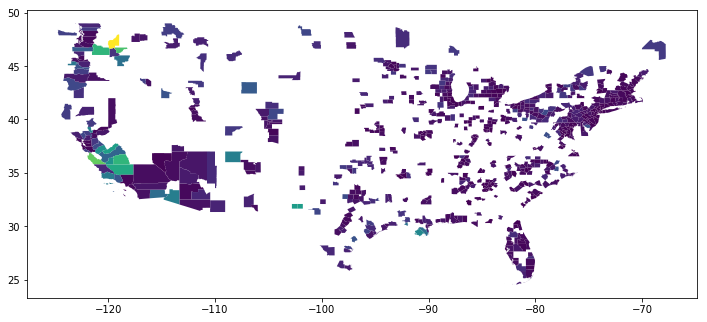

In [192]:
us_industry_counties_2016.plot(column='agriculture_prop',figsize=(12,8));

In [193]:
us_industry_counties_2016.crs = {'init': 'epsg:4326'}

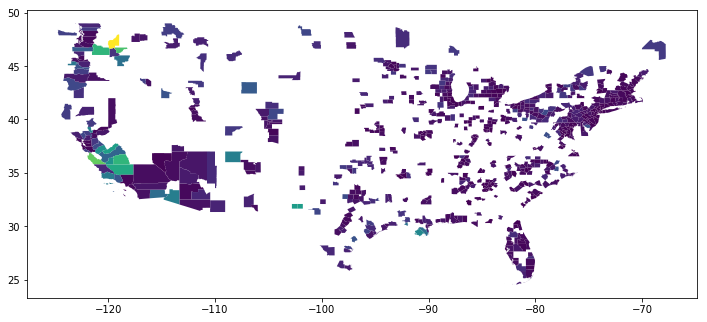

In [194]:
us_industry_counties_2016.plot(column='agriculture_prop',figsize=(12,8));

In [199]:
#Choose a better projection for mapping. This is web mercator 
conus_3857 = us_industry_counties_2016.to_crs(epsg=3857)

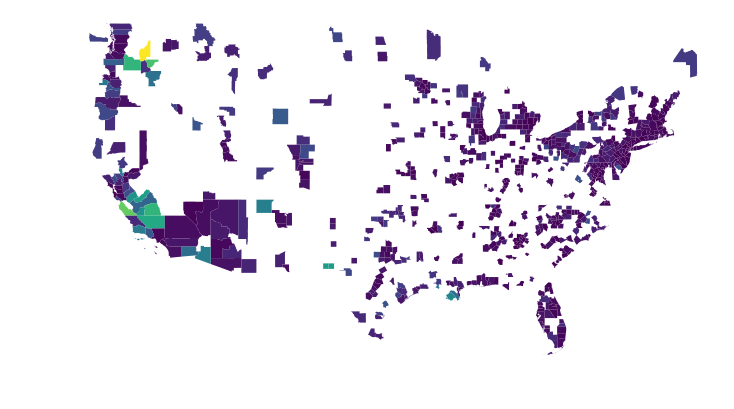

In [200]:
conus_3857.plot(column='agriculture_prop',figsize=(12,8));
plt.axis('off');

In [201]:
water_df = pd.read_csv(datasets+'water_usage.csv',encoding='iso-8859-1')

In [237]:
water_use = list(water_df.columns[7:78])
water_use.append('fips')

In [239]:
water_df = water_df[water_df['year']==2010][water_use]

In [240]:
water_df['sum_use'] = water_df[water_df.columns[:-1]].sum(axis=1)

In [242]:
water_df = water_df[['fips','sum_use']]

In [243]:
us_industry_counties_2016_water = us_industry_counties_2016.merge(water_df,on='fips')

In [244]:
us_industry_counties_2016_water.head()

,geo_id_x,fips,county,total_employed,agriculture,construction,manufacturing,wholesale_trade,retail_trade,transport_utilities,...,retail_trade_prop,transport_utilities_prop,information_prop,finance_insurance_realestate_prop,prof_scientific_waste_prop,edu_health_prop,arts_recreation_prop,other_prop,public_admin_prop,sum_use
0,0500000US01003,1003,"Baldwin County, Alabama",90197.0,1025.0,6108.0,9300.0,3509.0,10820.0,5422.0,...,11.995964,6.011286,0.605342,8.518022,10.905019,20.969655,7.406011,7.401577,4.077741,650.355
1,0500000US01015,1015,"Calhoun County, Alabama",46812.0,922.0,2683.0,8247.0,1766.0,5953.0,2076.0,...,12.716825,4.434760,1.209092,3.781082,7.263095,20.951893,8.822524,3.994702,7.735196,432.862
2,0500000US01043,1043,"Cullman County, Alabama",32765.0,883.0,3294.0,5326.0,808.0,4227.0,1254.0,...,12.900961,3.827255,1.135358,4.492599,8.554860,23.283992,4.764230,5.606592,3.964596,417.946
3,0500000US01055,1055,"Etowah County, Alabama",40918.0,177.0,2212.0,8184.0,1476.0,5061.0,2069.0,...,12.368640,5.056454,2.624762,3.411701,3.458136,20.103622,12.192678,6.908940,4.428369,409.340
4,0500000US01069,1069,"Houston County, Alabama",43418.0,674.0,2732.0,4005.0,1429.0,6042.0,3053.0,...,13.915887,7.031646,2.045235,3.648256,8.132572,24.192731,8.945599,6.863513,4.864342,425.097


In [247]:
us_industry_counties_2016_water = pd.DataFrame(us_industry_counties_2016_water)

Text(0, 0.5, 'Totl water use in county')

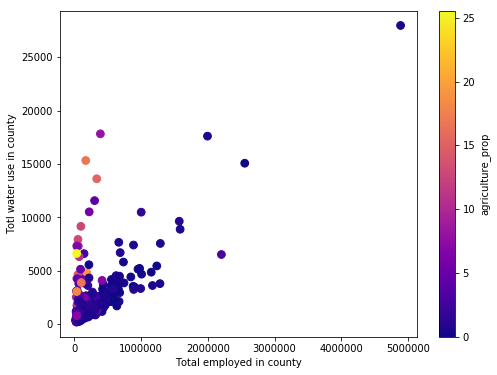

In [258]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
us_industry_counties_2016_water.plot(kind='scatter',\
        x='total_employed',y='sum_use',c='agriculture_prop',cmap='plasma',ax=ax,s=60)
ax.set_xlabel('Total employed in county')
ax.set_ylabel('Totl water use in county')